# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [4]:
# 수치형 변수로만
df = df.drop(columns = 'Gender')

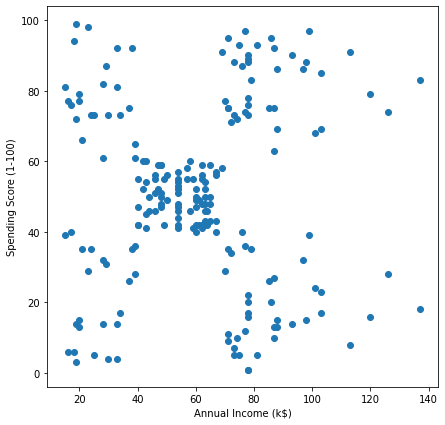

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 2. Clustering

## 3. Evaluation

### Hierarchical

In [8]:
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [10]:
# Euclidean
squareform(pdist(df, metric='euclidean'))

array([[  0.        ,  42.04759208,  33.03028913, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01333215, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.03028913,  75.01333215,   0.        , ..., 129.87686476,
        122.18428704, 143.77065069],
       ...,
       [117.1110584 , 111.7631424 , 129.87686476, ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18428704, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77065069, ...,  14.35270009,
         65.03076195,   0.        ]])

In [13]:
# Manhattan
squareform(pdist(df, metric='cityblock'))

array([[  0.,  44.,  35., ..., 159., 156., 177.],
       [ 44.,   0.,  77., ..., 129., 196., 133.],
       [ 35.,  77.,   0., ..., 190., 145., 208.],
       ...,
       [159., 129., 190., ...,   0.,  67.,  22.],
       [156., 196., 145., ...,  67.,   0.,  67.],
       [177., 133., 208., ...,  22.,  67.,   0.]])

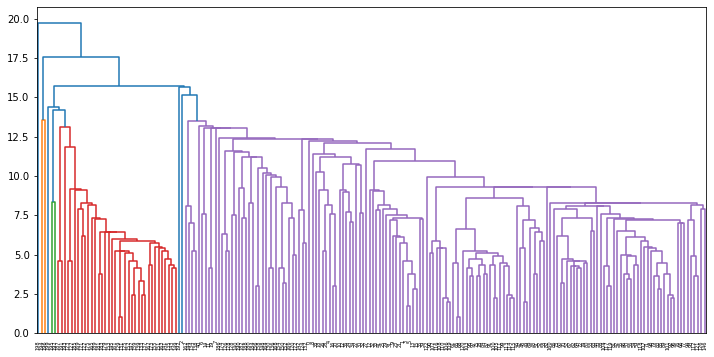

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

clust_single = linkage(df, method='single')
plt.figure(figsize = (12,6))
dendrogram(clust_single)
plt.show()

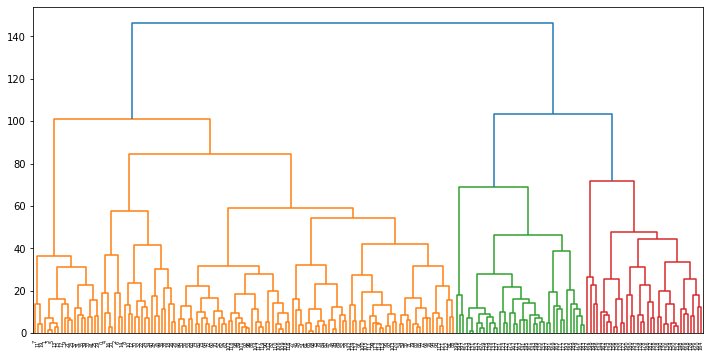

In [21]:
clust_complete = linkage(df, method='complete')
plt.figure(figsize = (12,6))
dendrogram(clust_complete)
plt.show()

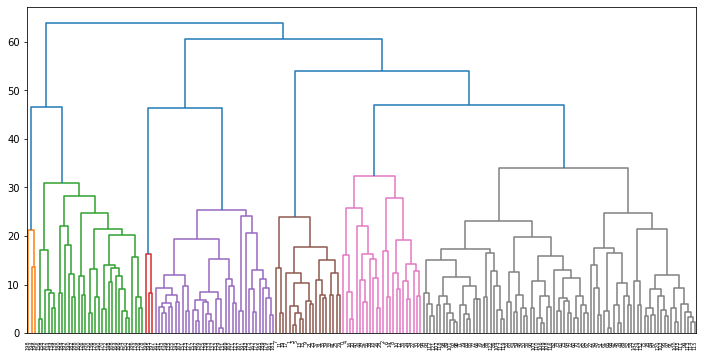

In [22]:
clust_avg = linkage(df, method='average')
plt.figure(figsize = (12,6))
dendrogram(clust_avg)
plt.show()

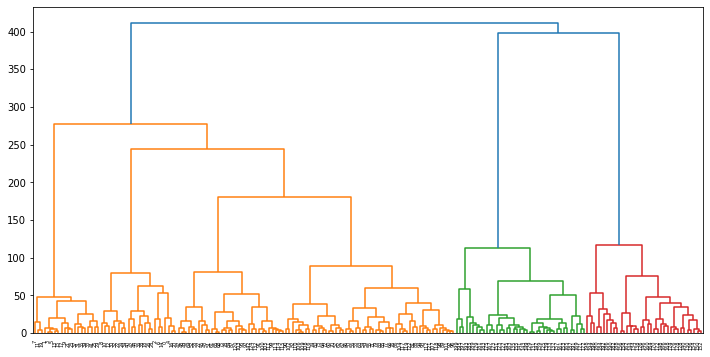

In [23]:
clust_ward = linkage(df, method='ward')
plt.figure(figsize = (12,6))
dendrogram(clust_ward)
plt.show()

In [25]:
# ward 방법으로
cluster = cut_tree(clust_ward, 3)

df['cluster'] = cluster
df.cluster = df.cluster.astype('category')
df.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [26]:
df.cluster.value_counts()

0    126
1     39
2     35
Name: cluster, dtype: int64

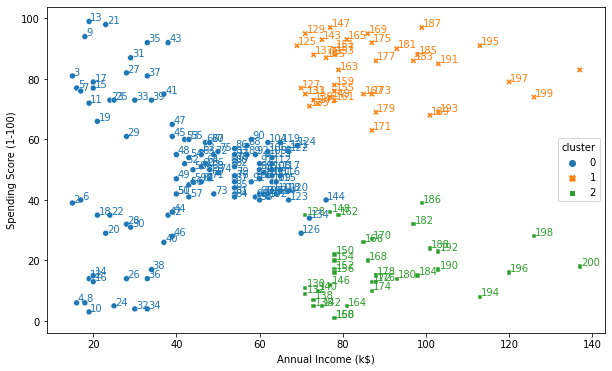

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", style="cluster", data=df)
for i in range(df.shape[0]):
    try:
        plt.text(x=df['Annual Income (k$)'][i]+0.3, 
                y=df['Spending Score (1-100)'][i]+0.3,
                s=df.index[i],
                color=sns.color_palette()[df.cluster[i]])
    except:
        continue
plt.show()

### Non-Hierarchical

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(df) # n_init의 default는 10 ( 랜덤 시드가 10번 )

df['cluster_km']=km.labels_
df['cluster_km']=df['cluster_km'].astype('category')

df.cluster_km.value_counts()

0    123
2     39
1     38
Name: cluster_km, dtype: int64

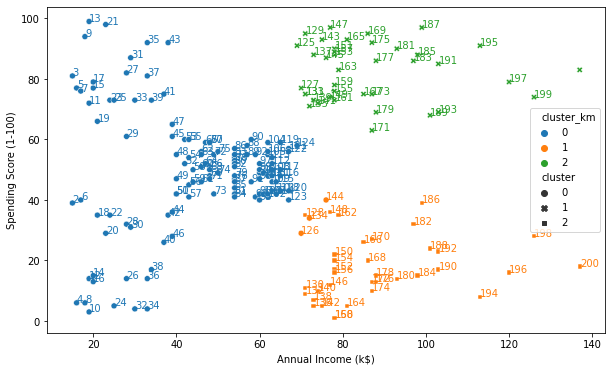

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster_km", style="cluster", data=df)
for i in range(df.shape[0]):
    try:
        plt.text(x=df['Annual Income (k$)'][i]+0.03, 
                y=df['Spending Score (1-100)'][i]+0.03,
                s=df.index[i],
                color=sns.color_palette()[df.cluster_km[i]])
        plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,3], marker="x", s=100,
            color=sns.color_palette()[:4])
    except:
        continue

plt.show()